In [ ]:
#Required Dataset: horse
#1.perform a good cleaning on the dataset no option of 
#2.Plot a graph showing the percentage for the values under the column of age and note your observation
#3.plot a graph to show the percentage rate for the column of Pain also note your observation
#4.plot a graph to determine the observation between age and outcome
#5.drop hospital_number and determine the dependent variable and split the data into train and test with test size of 0.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300.0,0.0,0,no
1,yes,adult,534817.0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0,no
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0.0,0.0,0,yes
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0,yes
4,no,adult,530255.0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300.0,0.0,0,no


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
nasogastric_reflux_ph,246,0.822742
abdomo_protein,201,0.672241
abdomo_appearance,168,0.561873
abdomen,124,0.414716
nasogastric_reflux,109,0.364548
nasogastric_tube,107,0.357860
rectal_exam_feces,107,0.357860
peripheral_pulse,73,0.244147
rectal_temp,65,0.217391
respiratory_rate,64,0.214047


In [6]:
df['surgery'] = df['surgery'].fillna(df['surgery'].dropna().mode().values[0] )
df['age'] = df['age'].fillna(df['age'].dropna().mode().values[0] )
df['temp_of_extremities'] = df['temp_of_extremities'].fillna(df['temp_of_extremities'].dropna().mode().values[0] )
df['peripheral_pulse'] = df['peripheral_pulse'].fillna(df['peripheral_pulse'].dropna().mode().values[0] )
df['mucous_membrane'] = df['mucous_membrane'].fillna(df['mucous_membrane'].dropna().mode().values[0] )
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['capillary_refill_time'].dropna().mode().values[0] )
df['pain'] = df['pain'].fillna(df['pain'].dropna().mode().values[0] )
df['abdomo_appearance'] = df['abdomo_appearance'].fillna(df['abdomo_appearance'].dropna().mode().values[0] )
df['peristalsis'] = df['peristalsis'].fillna(df['peristalsis'].dropna().mode().values[0] )
df['abdominal_distention'] = df['abdominal_distention'].fillna(df['abdominal_distention'].dropna().mode().values[0] )
df['nasogastric_tube'] = df['nasogastric_tube'].fillna(df['nasogastric_tube'].dropna().mode().values[0] )
df['nasogastric_reflux'] = df['nasogastric_reflux'].fillna(df['nasogastric_reflux'].dropna().mode().values[0] )
df['rectal_exam_feces'] = df['rectal_exam_feces'].fillna(df['rectal_exam_feces'].dropna().mode().values[0] )
df['abdomen'] = df['abdomen'].fillna(df['abdomen'].dropna().mode().values[0] )
df['surgical_lesion'] = df['surgical_lesion'].fillna(df['surgical_lesion'].dropna().mode().values[0] )
df['cp_data'] = df['cp_data'].fillna(df['cp_data'].dropna().mode().values[0] )
df['outcome'] = df['outcome'].fillna(df['outcome'].dropna().mode().values[0] )




In [11]:
df['nasogastric_reflux_ph'] = df['nasogastric_reflux_ph'].fillna(df['nasogastric_reflux_ph'].dropna().mean() )
df['abdomo_protein'] = df['abdomo_protein'].fillna(df['abdomo_protein'].dropna().mean() )
df['rectal_temp'] = df['rectal_temp'].fillna(df['rectal_temp'].dropna().mean() )
df['respiratory_rate'] = df['respiratory_rate'].fillna(df['respiratory_rate'].dropna().mean() )
df['total_protein'] = df['total_protein'].fillna(df['total_protein'].dropna().mean() )
df['packed_cell_volume'] = df['packed_cell_volume'].fillna(df['packed_cell_volume'].dropna().mean() )
df['pulse'] = df['pulse'].fillna(df['pulse'].dropna().mean() )
df['hospital_number'] = df['hospital_number'].fillna(df['hospital_number'].dropna().mean() )
df['lesion_2'] = df['lesion_2'].fillna(df['lesion_2'].dropna().mean() )
df['lesion_1'] = df['lesion_1'].fillna(df['lesion_1'].dropna().mean() )

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
surgery,0,0.0
age,0,0.0
lesion_3,0,0.0
lesion_2,0,0.0
lesion_1,0,0.0
surgical_lesion,0,0.0
outcome,0,0.0
abdomo_protein,0,0.0
abdomo_appearance,0,0.0
total_protein,0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        293 non-null    float64
 3   rectal_temp            234 non-null    float64
 4   pulse                  269 non-null    float64
 5   respiratory_rate       235 non-null    float64
 6   temp_of_extremities    299 non-null    object 
 7   peripheral_pulse       299 non-null    object 
 8   mucous_membrane        299 non-null    object 
 9   capillary_refill_time  299 non-null    object 
 10  pain                   299 non-null    object 
 11  peristalsis            299 non-null    object 
 12  abdominal_distention   299 non-null    object 
 13  nasogastric_tube       299 non-null    object 
 14  nasogastric_reflux     299 non-null    object 
 15  nasoga

In [13]:
df.shape

(299, 28)

In [14]:
fig = px.pie(names=df['age'],color=df['age'],
                            title='Percentage rate of age')
fig.show()

In [15]:
fig = px.pie(names=df['pain'],color=df['pain'],
                            title='Percentage rate of pain')
fig.show()

<AxesSubplot:xlabel='outcome', ylabel='count'>

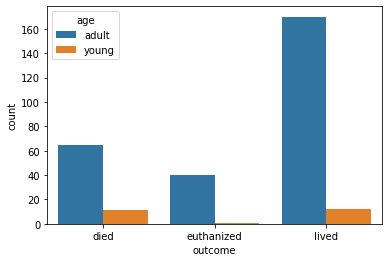

In [19]:
sns.countplot(x=df['outcome'],hue=df['age'])

In [18]:
df.drop('hospital_number',axis = 1, inplace = True)

In [21]:
enc = LabelEncoder()
category_var =['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane',
'capillary_refill_time','pain','abdomo_appearance', 'peristalsis', 'abdominal_distention',
'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces','abdomen', 'surgical_lesion','cp_data' ]
for Car in category_var:
    df[Car]=(enc.fit_transform(df[Car]))

In [23]:
X = df.drop('outcome', axis=1)
y = df['outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [35]:
clf1 = Pipeline([('clf', LogisticRegression())])
clf2 = Pipeline([('clf', KNeighborsClassifier())])
clf3 = Pipeline([('clf', DecisionTreeClassifier())])
clf4 = Pipeline([('clf', RandomForestClassifier())])

In [37]:
clf1.fit(X_train,y_train)


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('clf', LogisticRegression())])

In [38]:
clf2.fit(X_train,y_train)


Pipeline(steps=[('clf', KNeighborsClassifier())])

In [39]:
clf3.fit(X_train,y_train)


Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [40]:
clf4.fit(X_train,y_train)

Pipeline(steps=[('clf', RandomForestClassifier())])

In [42]:
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)
pred4 = clf4.predict(X_test)
print(pred1)
print('\n')
print(pred2)
print('\n')
print(pred3)
print('\n')
print(pred4)

['lived' 'lived' 'lived' 'lived' 'lived' 'lived' 'died' 'died' 'lived'
 'lived' 'lived' 'lived' 'lived' 'died' 'lived' 'lived' 'lived' 'died'
 'lived' 'lived' 'died' 'lived' 'lived' 'lived' 'lived' 'lived' 'lived'
 'lived' 'lived' 'lived' 'lived' 'lived' 'lived' 'died' 'lived' 'lived'
 'lived' 'lived' 'lived' 'lived' 'died' 'lived' 'lived' 'lived' 'died'
 'died' 'lived' 'lived' 'lived' 'lived' 'lived' 'died' 'lived' 'lived'
 'lived' 'lived' 'lived' 'lived' 'died' 'lived']


['died' 'lived' 'died' 'lived' 'lived' 'lived' 'died' 'died' 'euthanized'
 'euthanized' 'lived' 'lived' 'lived' 'lived' 'lived' 'lived' 'lived'
 'lived' 'died' 'lived' 'lived' 'euthanized' 'died' 'died' 'died' 'lived'
 'lived' 'died' 'lived' 'died' 'lived' 'lived' 'lived' 'died' 'died'
 'lived' 'lived' 'lived' 'euthanized' 'lived' 'died' 'lived' 'lived'
 'died' 'died' 'died' 'died' 'lived' 'died' 'died' 'lived' 'lived' 'lived'
 'died' 'died' 'lived' 'died' 'lived' 'died' 'died']


['euthanized' 'lived' 'euthanized' 

In [43]:
print(clf1.score(X_test,y_test))
print(clf2.score(X_test,y_test))
print(clf3.score(X_test,y_test))
print(clf4.score(X_test,y_test))

0.6666666666666666
0.6833333333333333
0.7
0.8166666666666667


In [44]:
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test, pred1))


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

        died       0.64      0.37      0.47        19
  euthanized       0.00      0.00      0.00         5
       lived       0.67      0.92      0.78        36

    accuracy                           0.67        60
   macro avg       0.44      0.43      0.41        60
weighted avg       0.61      0.67      0.61        60

[[ 7  0 12]
 [ 1  0  4]
 [ 3  0 33]]


In [45]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

        died       0.58      0.74      0.65        19
  euthanized       0.25      0.20      0.22         5
       lived       0.81      0.72      0.76        36

    accuracy                           0.68        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.69      0.68      0.68        60

[[14  0  5]
 [ 3  1  1]
 [ 7  3 26]]


In [46]:
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

        died       0.70      0.37      0.48        19
  euthanized       0.14      0.20      0.17         5
       lived       0.79      0.94      0.86        36

    accuracy                           0.70        60
   macro avg       0.54      0.50      0.50        60
weighted avg       0.71      0.70      0.68        60

[[ 7  6  6]
 [ 1  1  3]
 [ 2  0 34]]


In [47]:
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test, pred4))

              precision    recall  f1-score   support

        died       0.87      0.68      0.76        19
  euthanized       0.00      0.00      0.00         5
       lived       0.80      1.00      0.89        36

    accuracy                           0.82        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.75      0.82      0.78        60

[[13  0  6]
 [ 2  0  3]
 [ 0  0 36]]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

